# Lion`s Den ING Risk Modelling Challenge 2024
## Preliminary Task

> Imagine that you are a credit risk model developer working for a large bank. Recently, it was noticed that the predictive power of current tool, used to estimate the probability of default for customers applying for an Instalment Loan product, has significantly decreased. Your direct manager asked you to create a model which will replace the current one. Your work will be vital to the company since retail term loan portfolio is one of the largest in the institution. Your colleague, Barbara, has already prepared data for you.
(...)

> In this task, your aim is to build* a **logistic regression** and a challenger model that will allow you to precisely quantify probability of default of bank’s clients, namely retail customers applying for term loans, and to present modelling and prediction results.
### Tasks:
- build a logistic regression in Python or Julia
- build a challenger model that will quantify the __probability__ of default of bank's client
- present modelling and prediction results

# 1.1 Describe the dataset
Available datasets:
- development_sample.csv - train data (50000 records, 36 features), included targets. For model training purposes.
- testing_sample.csv - test data (5000 records, 36 features), also included targets. Just for validation purposes.

## Variables:
- id	Application ID (NUMERICAL DISCRETE)
- customer_id	Customer ID (NUMERICAL DISCRETE)
- application_date	Application date (DATETIME) 
- **target	"Default indicator: 1. loan went into default, 0. facility performing *Missing for rejected applications*** (BINARY)
- application_status	Application status (Approved/Rejected) (BINARY)
- Var1 — Number of applicants (NUMERICAL DISCRETE)
- Var2 — Loan purpose: (CATEGORICAL NOMINAL)
    - 1 - Car Loan
    - 2	- House Renovation
    - 3	- Short Cash
- Var3 — Distribution channel: (CATEGORICAL NOMINAL)
    - 1 - Direct
    - 2 - Broker
    - 3 - Online
- Var4 — Application amount (NUMERICAL)
- Var5 — Credit duration (months) (NUMERICAL)
- Var6 — Payment frequency: (CATEGORICAL ORDINAL)
    - 1	- monthly
    - 3	- quarterly
    - 6	- bi-yearly
- Var7 — Installment amount (NUMERICAL CONTINUOUS)
- Var8 — Value of the goods (car) (NUMERICAL CONTINUOUS)
- Var9 — Application data: income of main applicant (NUMERICAL CONTINUOUS)
- Var10 — Application data: income of second applicant (NUMERICAL CONTINUOUS)
- Var11 — Application data: profession of main applicant (CATEGORICAL NOMINAL): 
    - 1	- Pensioneer
    - 2	- Government
    - 3	- Military
    - 4	- Self Employed
    - 5	- Employee
    - 6	- Business Owner
    - 7	- Unemployed
- Var12 — Application data: profession of second applicant (CATEGORICAL NOMINAL): 
    - 1	- Pensioneer
    - 2	- Government
    - 3	- Military
    - 4	- Self Employed
    - 5	- Employee
    - 6	- Business Owner
    - 7	- Unemployed
- Var13 — Application data: employment date (main applicant) (DATE)
- Var14 — Application data: marital status of main applicant (CATEGORICAL NOMINAL):
    - 0	- Single
    - 1	- Married
    - 2	- Informal relationship
    - 3	- Divorced
    - 4 - Widowed
- Var15 — Application data: number of children of main applicant (NUMERICAL DISCRETE)
- Var16 — Application data: number of dependences of main applicant (NUMERICAL DISCRETE)
- Var17 — Spendings estimation (NUMERICAL CONTINUOUS)
- Var18 — Property ownership for property renovation (BINARY)
- Var19 — Clasification of the vehicle (Car, Motorbike) (BINARY)
- Var20 — Number of requests during the last 3 months (External data) (NUMERICAL DISCRETE)
- Var21 — Number of requests during the last 6 months (External data) (NUMERICAL DISCRETE)
- Var22 — Number of requests during the last 9 months (External data) (NUMERICAL DISCRETE)
- Var23 — Number of requests during the last 12 months (External data) (NUMERICAL DISCRETE)
- Var24 — Limit on credit card (NUMERICAL CONTINUOUS)
- Var25 — Amount on current account (NUMERICAL CONTINOUS)
- Var26 — Amount on savings account (NUMERICAL CONTINOUS)
- Var27 — Arrear (zaległość) in last 3 months (indicator) (BINARY)
- Var28 — Arrear (zaległość) in last 12 months (indicator) (BINARY)
- Var29 — Credit bureau score (Exterval data) (NUMERICAL DISCRETE)
- Var30 — Average income (Exterval data) (NUMERICAL CONTINOUS)


In [109]:
import warnings
warnings.filterwarnings('ignore')

### Import of datasets:

In [60]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('https://files.challengerocket.com/files/lions-den-ing-2024/development_sample.csv')
test_data = pd.read_csv('https://files.challengerocket.com/files/lions-den-ing-2024/testing_sample.csv')


### Splitting variables into subtypes

In [48]:
discrete_variables = [appliacnt
    'Var5', 'Var9', 'Var24', 'Var30'
]

continuous_variables = [
    'Var7', 'Var8', 'Var10', 
    'Var17', 'Var25', 'Var26', '_r_'
]

binary_variables = [
    'target', 'Application_status', 'Var18', 
    'Var19', 'Var27', 'Var28'
]

categorical_nominal_variables = [
    'Var2', 'Var3', 'Var11', 'Var12', 'Var14'
]

categorical_ordinal_variables = [
    'Var6'
]


datetime_variables = [
    'application_date', 'Var13'
]


Are there any features missing?

In [49]:
from itertools import chain
assigned_vars = pd.Index(chain.from_iterable([discrete_variables, continuous_variables, 
binary_variables, categorical_nominal_variables, categorical_ordinal_variables, datetime_variables]))
print("Variables not assigned yet:", train_data.columns.difference(assigned_vars) if train_data.columns.difference(assigned_vars).shape[0] else "ALL ASSIGNED")

Variables not assigned yet: ALL ASSIGNED


Discrete variables:

In [50]:
train_data[discrete_variables]

,ID,customer_id,Var1,Var15,Var16,Var20,Var21,Var22,Var23,Var29,Var4,Var5,Var9,Var24,Var30
0,11034977,32537148,1,0,0,1,1,1,1,0,7800,99,5640,0,3899
1,11034978,32761663,1,4,4,0,0,0,0,0,11100,78,3000,15000,3899
2,11034979,32701063,2,0,0,1,2,2,2,10,2400,15,6240,0,3899
3,11034980,32386786,3,0,0,0,0,0,0,10,11800,30,4560,0,3899
4,11034981,32692110,1,2,4,0,0,2,2,20,10200,72,5160,0,3899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,11084972,32554904,2,0,1,1,2,2,2,0,49200,111,6240,0,12832
49996,11084973,32884069,1,1,1,2,2,3,4,0,25600,30,23640,0,12832
49997,11084974,32433438,1,0,0,0,0,0,0,0,46700,18,24840,0,12832
49998,11084975,32877592,1,1,1,2,3,3,3,10,44300,162,20400,102000,12832


Continous variables:

In [52]:
train_data[continuous_variables]


,Var7,Var8,Var10,Var17,Var25,Var26,_r_
0,108.73,NaN,NaN,3272.31,6768.42,0.00,0.267045
1,195.99,11200.0,NaN,1387.35,5937.66,3870.60,0.533040
2,248.34,NaN,4300.0,4703.28,5647.77,1463.08,0.861555
3,3538.68,12400.0,2500.0,2508.70,3594.90,21563.78,0.506451
4,580.26,NaN,NaN,2564.96,9908.45,0.00,0.210913
...,...,...,...,...,...,...,...
49995,621.69,52600.0,11900.0,6829.92,NaN,NaN,0.783954
49996,1215.29,NaN,NaN,11465.61,NaN,NaN,0.172590
49997,3963.94,79000.0,NaN,9876.73,9288.87,255018.31,0.060722
49998,1179.81,69400.0,NaN,9857.96,NaN,NaN,0.845866


Nominal variables:

In [53]:
train_data[categorical_nominal_variables]

,Var2,Var3,Var11,Var12,Var14
0,2.0,1,5,NaN,2
1,1.0,2,2,NaN,4
2,3.0,1,5,5.0,1
3,1.0,2,6,5.0,1
4,2.0,1,5,NaN,0
...,...,...,...,...,...
49995,1.0,1,4,5.0,0
49996,2.0,1,5,NaN,0
49997,1.0,1,5,NaN,0
49998,1.0,Direct,4,NaN,0


Ordinal variables:

In [54]:
train_data[categorical_ordinal_variables]


,Var6
0,1
1,1
2,1
3,6
4,3
...,...
49995,1
49996,1
49997,1
49998,3


Datetime variables:

In [55]:
train_data[datetime_variables]


,application_date,Var13
0,01Feb2010 0:00:00,26Nov2004
1,01Feb2010 0:00:00,16Sep1996
2,01Feb2010 0:00:00,06May1989
3,01Feb2010 0:00:00,06Dec1987
4,02Feb2010 0:00:00,18May1989
...,...,...
49995,31Dec2020 0:00:00,28Mar2008
49996,31Dec2020 0:00:00,10Nov1998
49997,31Dec2020 0:00:00,28Oct2006
49998,31Dec2020 0:00:00,31Oct2016


### How many NaNs?

In [77]:
percent_of_nans = (np.sum(train_data.isna(), axis=0)/train_data.shape[0])
percent_of_nans[percent_of_nans > 0].sort_values(ascending=False)

Var10     0.75076
Var12     0.75076
Var18     0.74832
Var8      0.58346
Var19     0.58346
Var26     0.39766
target    0.26564
Var25     0.20176
Var2      0.02806
Var3      0.02806
Var17     0.00080
dtype: float64

There are a lot of NaNs in:
1. Var10 - income of second applicant, NaN because there might be lack of second applicant
2. Var12 - profesion of second applicant, NaN because there migth be lack fo second applicant
Equality of those NaN percentages suggest that it indicates lack of second applicant.
3. Var18 - it is about property renovation, so it is only when property renovation is a subject of loan, otherwise NaN
4. Var8 - value of car/motorbike, so if there is NaN there is no car.
5. Var19 - 1 if car, 0 if motorbike. Also NaN if Var18 NaN
6. Var26 - amount of savings on saving account, lack means lack of saving account *information can be extracted: people who own savings account might be more safe with money, so less prone to default*
7. target - nan if rejected
8. var25 - can't interpret it... maybe lack of account in general?
9. Var2 - purpose of loan, might be human error
10. Var3 - distribution channel, might be also human error
11. Var17 - spending estimation, might be lack of such

What to do with each?

1. Var10 - set 0, because there is no second aplicant, so no income
2. Var12  - create new value: 0, it will mean that there is not second applicant, in further one hot encoding it will be clearly seen
3. Var18 - add variable 'ifRenovation', where it will take 1 if not NaN here. Dunno what to do more with that.
4. Var8 - set 0 if NaN, there is no car or motorbike so the value is 0. 
5. Var19 - same as with Var18 probably
6. Var26 - set 0 if NaN but also add variable 'hasSavingsAccount' that takes 0 if it is NaN and 1 otherwise. It will discriminate amongst people that opened this account but don't have savings and people who don't bother
7. target - don't need to do anything. Might be worth looking into: how many of those would get loan according to our model and try to see if in this subsample, distribution is similar. Then we would know if those applicants were really worse than the accepted population(?) Just guessing
8. Var2 - simple impute by dominant / drop 
9. Var3 - simple impute by dominant / drop
10. Var17 - drop. Giving mean might be tempting, but there are few observations that are missing and we don't want to mess data for the model.

## Analyzing the features that are not missing
## Numerical

In [87]:
features_wo_nulls = train_data.loc[:, percent_of_nans == 0].columns

Numerical discrete

In [90]:
train_data[features_wo_nulls.intersection(discrete_variables)].describe()

,ID,customer_id,Var1,Var4,Var5,Var9,Var15,Var16,Var20,Var21,Var22,Var23,Var24,Var29,Var30
count,5.000000e+04,5.000000e+04,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,1.105998e+07,3.262894e+07,1.33786,17123.466000,42.141900,10138.046400,0.764300,1.023900,0.552060,0.995460,1.355780,1.714940,7693.896000,6.78040,8182.152860
std,1.443390e+04,1.537429e+05,0.66462,12217.178461,45.378778,5311.906294,0.982652,1.174647,0.970128,1.340983,1.591129,1.814075,20984.098355,10.83386,3190.983287
min,1.103498e+07,3.236142e+07,1.00000,700.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3899.000000
25%,1.104748e+07,3.249680e+07,1.00000,6900.000000,15.000000,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5035.000000
50%,1.105998e+07,3.263026e+07,1.00000,14100.000000,27.000000,9000.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,8569.000000
75%,1.107248e+07,3.276254e+07,1.00000,24800.000000,48.000000,13320.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,10.00000,11839.000000
max,1.108498e+07,3.289438e+07,4.00000,63700.000000,312.000000,43320.000000,5.000000,8.000000,15.000000,22.000000,23.000000,26.000000,190800.000000,250.00000,12832.000000


(Describe the results)

Numerical continuous

In [91]:
train_data[features_wo_nulls.intersection(continuous_variables)].describe()


,Var7,_r_
count,50000.000000,5.000000e+04
mean,1330.747722,4.980869e-01
std,1619.370201,2.880834e-01
min,53.980000,3.953460e-07
25%,470.112500,2.481838e-01
50%,842.060000,4.966425e-01
75%,1548.790000,7.468285e-01
max,27075.540000,9.999984e-01


(Describe the results)

### Categorical

Nominal (here only the mode and maybe the distribution shape is important):

In [94]:
train_data[features_wo_nulls.intersection(categorical_nominal_variables)].mode()


,Var11,Var14
0,5,0


<AxesSubplot:title={'center':'Distribution of professions in applicants'}, xlabel='Var11'>

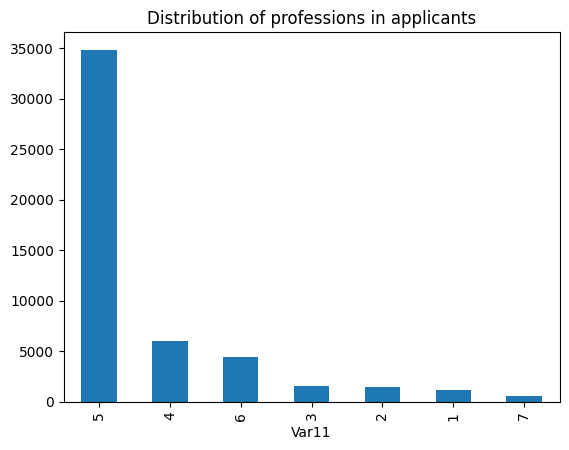

In [112]:
train_data['Var11'].value_counts().plot.bar(title="Distribution of professions in applicants")

<AxesSubplot:title={'center':'Distribution of martial statuses in applicants'}, xlabel='Var14'>

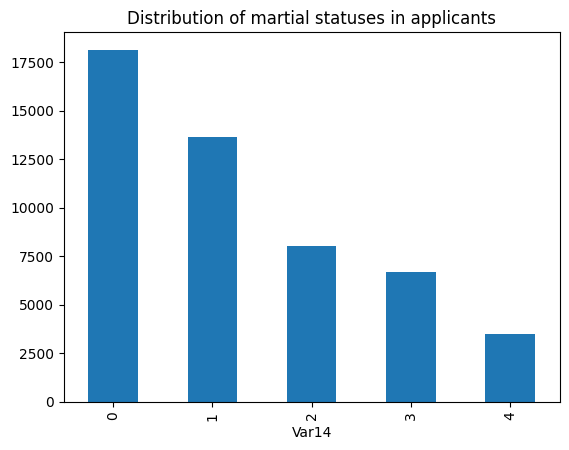

In [113]:
train_data['Var14'].value_counts().plot.bar(title="Distribution of martial statuses in applicants")


Ordinal (here median, mode, distribution shape):

In [97]:
train_data[features_wo_nulls.intersection(categorical_ordinal_variables)].describe()


,Var6
count,50000.00000
mean,1.54724
std,1.23719
min,1.00000
25%,1.00000
50%,1.00000
75%,1.00000
max,6.00000


<AxesSubplot:title={'center':'Distribution of loan payment frequencies'}, xlabel='Var6'>

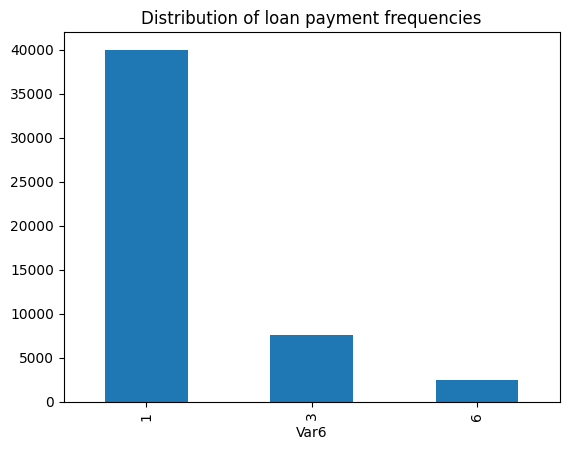

In [114]:
train_data["Var6"].value_counts().plot.bar(title="Distribution of loan payment frequencies")